In [63]:
#Imports
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, chi2 # normal distribution, chi squared distribution
from numpy import exp, pi, sqrt
import lmfit

In [50]:
def fit_to_lorentzian(data):
    #type of data is numpy array w/ 2 columns
    def Lorentzian(x, amp, cen, scale):
        return amp * (1/(pi*scale))*(1/(1+(((x-cen)/scale)**2)))
    
    
    model = lmfit.Model(Lorentzian)
    
    x_axis = data[:, 0]
    y_axis = data[:, 1]
    
    result = model.fit(y_axis, x=x_axis, amp=1, cen=10, scale=0.5)
    
    
    return result




In [59]:
def show_results(result):
    lmfit.report_fit(result)
    plt.figure()
    plt.figure(figsize=(100, 100))
    result.plot()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 84
    # data points      = 100
    # variables        = 3
    chi-square         = 1.000e-248
    reduced chi-square = 0.00000000
    Akaike info crit   = -57558.6273
    Bayesian info crit = -57550.8118
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:    2.00000000 +/- 0.00000000 (0.00%) (init = 1)
    cen:    20.0000000 +/- 0.00000000 (0.00%) (init = 10)
    scale:  0.25000000 +/- 0.00000000 (0.00%) (init = 0.5)


<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

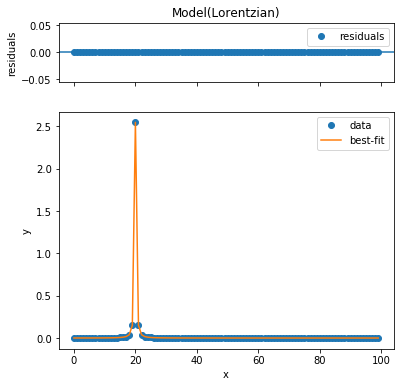

In [62]:
#Test  
data = np.zeros([100, 2])
for i in range(0, 100):
    data[i, 0] = i
    data[i,1] = 2 * (1/(pi*0.25))*(1/(1+(((i-20)/0.25)**2)))

result = fit_to_lorentzian(data)
show_results(result)